1. Cálculo del histograma en OpenCV
Entonces ahora usamos la función cv.calcHist() para encontrar el histograma. Familiaricémonos con la función y sus parámetros:

cv.calcHist(imágenes, canales, máscara, histSize, rangos[, hist[, acumular]])
imágenes: es la imagen fuente de tipo uint8 o float32. debe aparecer entre corchetes, es decir, "[img]".
canales: también aparece entre corchetes. Es el índice del canal para el cual calculamos el histograma. Por ejemplo, si la entrada es una imagen en escala de grises, su valor es [0]. Para imágenes en color, puede pasar [0], [1] o [2] para calcular el histograma del canal azul, verde o rojo respectivamente.
máscara: imagen de máscara. Para encontrar el histograma de la imagen completa, se indica "Ninguno". Pero si desea encontrar el histograma de una región particular de la imagen, debe crear una imagen de máscara para eso y asignarla como máscara. (Mostraré un ejemplo más adelante).
histSize: esto representa nuestro recuento de BIN. Debe indicarse entre corchetes. Para escala completa, pasamos [256].
gamas: esta es nuestra GAMA. Normalmente es [0,256].
Entonces, comencemos con una imagen de muestra. Simplemente cargue una imagen en modo escala de grises y encuentre su histograma completo.

In [1]:
import cv2 as cv
import numpy as np

In [2]:
img = cv.imread('resources/home.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
hist = cv.calcHist([img],[0],None,[256],[0,256])

2. Cálculo del histograma en Numpy
Numpy también te proporciona una función, np.histogram() . Entonces, en lugar de la función calcHist() , puedes probar la siguiente línea:

In [3]:
hist,bins = np.histogram(img.ravel(),256,[0,256])

Trazar histogramas.

Hay dos maneras para esto,

-Manera corta: use las funciones de trazado de Matplotlib
-Largo camino: utilice las funciones de dibujo de OpenCV

1. Usando Matplotlib

Matplotlib viene con una función de trazado de histograma: matplotlib.pyplot.hist()

Encuentra directamente el histograma y lo traza. No es necesario utilizar la función calcHist() o np.histogram() para encontrar el histograma. Vea el código a continuación:

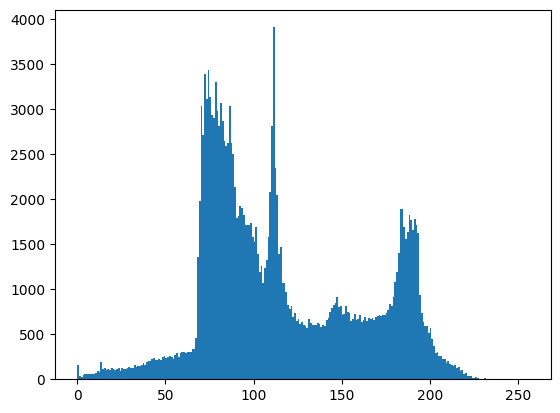

In [4]:
from matplotlib import pyplot as plt
img = cv.imread('resources/home.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
plt.hist(img.ravel(),256,[0,256]); plt.show()

O puede usar el gráfico normal de matplotlib, lo que sería bueno para el gráfico BGR. Para eso, primero debe encontrar los datos del histograma. Pruebe el siguiente código:

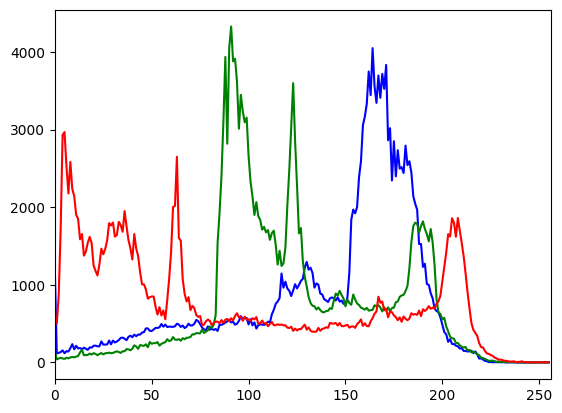

In [5]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('resources/home.jpg')
assert img is not None, "file could not be read, check with os.path.exists()"
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

2. Usando OpenCV

Bueno, aquí ajustas los valores de los histogramas junto con sus valores bin para que parezcan coordenadas x,y para que puedas dibujarlos usando la función cv.line() o cv.polyline() para generar la misma imagen que arriba. Esto ya está disponible con muestras oficiales de OpenCV-Python2. Consulte el código en samples/python/hist.py.

Aplicación de máscara.

Usamos cv.calcHist() para encontrar el histograma de la imagen completa. ¿Qué pasa si quieres encontrar histogramas de algunas regiones de una imagen? Simplemente cree una imagen de máscara con color blanco en la región donde desea encontrar el histograma y negro en caso contrario. Luego pasa esto como máscara.

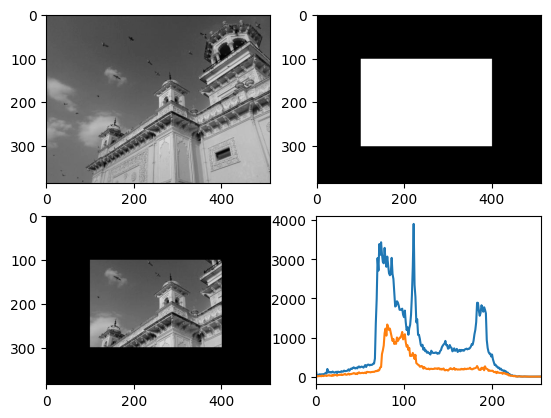

In [6]:
img = cv.imread('resources/home.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:300, 100:400] = 255
masked_img = cv.bitwise_and(img,img,mask = mask)
# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv.calcHist([img],[0],mask,[256],[0,256])
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()

Considere una imagen cuyos valores de píxeles se limitan únicamente a un rango específico de valores. Por ejemplo, una imagen más brillante tendrá todos los píxeles confinados a valores altos. Pero una buena imagen tendrá píxeles de todas las regiones de la imagen. Por lo tanto, debe estirar este histograma hacia cualquiera de los extremos (como se muestra en la imagen a continuación, de wikipedia) y eso es lo que hace la ecualización de histograma (en palabras simples). Esto normalmente mejora el contraste de la imagen.

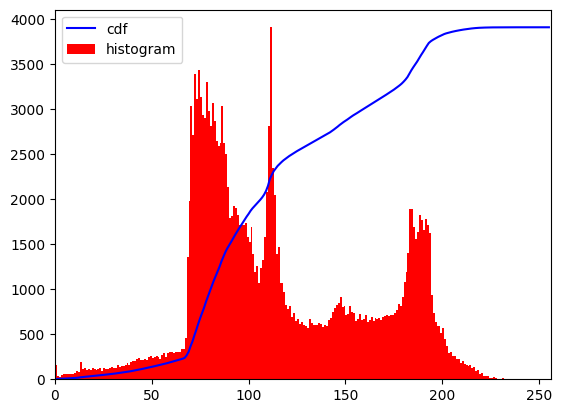

In [7]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('resources/home.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

Le recomendaría que lea la página de Wikipedia sobre Ecualización de histograma para obtener más detalles al respecto. Tiene una muy buena explicación con ejemplos resueltos, para que entiendas casi todo después de leerlo. En cambio, aquí veremos su implementación de Numpy. Después de eso, veremos la función OpenCV.

In [8]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

Ahora tenemos la tabla de búsqueda que nos brinda información sobre cuál es el valor del píxel de salida para cada valor de píxel de entrada. Entonces simplemente aplicamos la transformación.



In [9]:
img2 = cdf[img]

Ecualización de histogramas en OpenCV
OpenCV tiene una función para hacer esto, cv.equalizeHist() . Su entrada es solo una imagen en escala de grises y la salida es nuestra imagen ecualizada de histograma.



In [10]:
img = cv.imread('resources/home.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
equ = cv.equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side
cv.imwrite('resources/res.png',res)

True

CLAHE (Ecualización de histograma adaptativo limitado por contraste).

La primera ecualización de histograma que acabamos de ver considera el contraste global de la imagen. En muchos casos, no es una buena idea. Por ejemplo, la siguiente imagen muestra una imagen de entrada y su resultado después de la ecualización del histograma global.

Es cierto que el contraste del fondo ha mejorado después de la ecualización del histograma. Pero compare el rostro de la estatua en ambas imágenes. Perdimos la mayor parte de la información allí debido al exceso de brillo. Esto se debe a que su histograma no se limita a una región particular como vimos en casos anteriores (intente trazar el histograma de la imagen de entrada, obtendrá más intuición).

Entonces, para resolver este problema, se utiliza la ecualización de histograma adaptativa . En esto, la imagen se divide en pequeños bloques llamados "mosaicos" (tileSize es 8x8 de forma predeterminada en OpenCV). Luego, cada uno de estos bloques se ecualiza como de costumbre. Entonces, en un área pequeña, el histograma se limitaría a una región pequeña (a menos que haya ruido). Si hay ruido, se amplificará. Para evitar esto, se aplica limitación de contraste . Si algún contenedor de histograma está por encima del límite de contraste especificado (por defecto 40 en OpenCV), esos píxeles se recortan y distribuyen uniformemente a otros contenedores antes de aplicar la ecualización del histograma. Después de la ecualización, para eliminar artefactos en los bordes de los mosaicos, se aplica la interpolación bilineal.

El siguiente fragmento de código muestra cómo aplicar CLAHE en OpenCV:

In [11]:
import numpy as np
import cv2 as cv
img = cv.imread('resources/home.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
# create a CLAHE object (Arguments are optional).
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img)
cv.imwrite('resources/clahe_2.jpg',cl1)

True

Introducción.

En el primer artículo, calculamos y trazamos un histograma unidimensional. Se llama unidimensional porque solo tomamos en consideración una característica, es decir, el valor de intensidad en escala de grises del píxel. Pero en los histogramas bidimensionales, se consideran dos características. Normalmente se utiliza para encontrar histogramas de color donde dos características son valores de Tono y Saturación de cada píxel.

Ya existe una muestra de Python (samples/python/color_histogram.py) para encontrar histogramas de color. Intentaremos comprender cómo crear un histograma de color de este tipo y será útil para comprender otros temas como la retroproyección del histograma.

In [12]:
import numpy as np
import cv2 as cv
img = cv.imread('resources/home.jpg')
assert img is not None, "file could not be read, check with os.path.exists()"
hsv = cv.cvtColor(img,cv.COLOR_BGR2HSV)
hist = cv.calcHist([hsv], [0, 1], None, [180, 256], [0, 180, 0, 256])

Histograma 2D en OpenCV.

Es bastante simple y se calcula usando la misma función, cv.calcHist() . Para histogramas de color, necesitamos convertir la imagen de BGR a HSV. (Recuerde, para el histograma 1D, convertimos de BGR a escala de grises). Para histogramas 2D, sus parámetros se modificarán de la siguiente manera:

-canales = [0,1] porque necesitamos procesar tanto el plano H como el S.

-bins = [180,256] 180 para el plano H y 256 para el plano S.

-rango = [0,180,0,256] El valor de tono se encuentra entre 0 y 180 y la saturación se encuentra entre 0 y 256.

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('resources/home.jpg')
assert img is not None, "file could not be read, check with os.path.exists()"
hsv = cv.cvtColor(img,cv.COLOR_BGR2HSV)
hist, xbins, ybins = np.histogram2d(h.ravel(),s.ravel(),[180,256],[[0,180],[0,256]])

Histograma 2D en Numpy.

Numpy también proporciona una función específica para esto: np.histogram2d() . (Recuerde, para el histograma 1D usamos np.histogram() ).

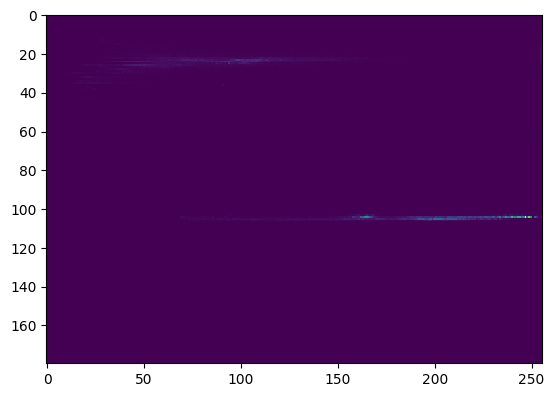

In [14]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('resources/home.jpg')
assert img is not None, "file could not be read, check with os.path.exists()"
hsv = cv.cvtColor(img,cv.COLOR_BGR2HSV)
hist = cv.calcHist( [hsv], [0, 1], None, [180, 256], [0, 180, 0, 256] )
plt.imshow(hist,interpolation = 'nearest')
plt.show()

Trazar histogramas 2D

Método - 1: Usar cv.imshow().

El resultado que obtenemos es una matriz bidimensional de tamaño 180x256. Entonces podemos mostrarlos como lo hacemos normalmente, usando la función cv.imshow() . Será una imagen en escala de grises y no dará mucha idea de qué colores hay, a menos que conozca los valores de tono de los diferentes colores.

Método - 2: Usar Matplotlib.

Podemos usar la función matplotlib.pyplot.imshow() para trazar un histograma 2D con mapas de diferentes colores. Nos da una idea mucho mejor sobre las diferentes densidades de píxeles. Pero esto tampoco nos da una idea de qué color hay a primera vista, a menos que conozca los valores de tono de los diferentes colores. Aún así prefiero este método. Es simple y mejor.

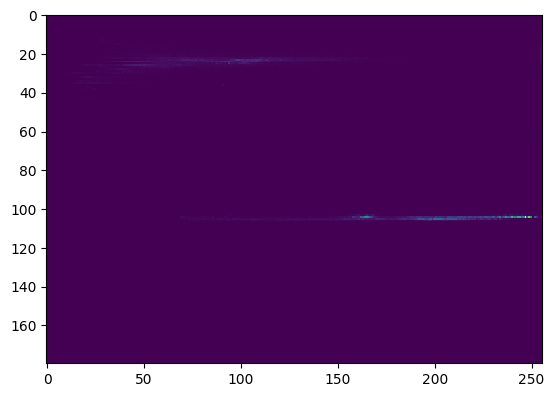

In [15]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('resources/home.jpg')
assert img is not None, "file could not be read, check with os.path.exists()"
hsv = cv.cvtColor(img,cv.COLOR_BGR2HSV)
hist = cv.calcHist( [hsv], [0, 1], None, [180, 256], [0, 180, 0, 256] )
plt.imshow(hist,interpolation = 'nearest')
plt.show()

Método 3: ¡Estilo de muestra OpenCV!

Hay un código de muestra para el histograma de color en las muestras de OpenCV-Python2 (samples/python/color_histogram.py). Si ejecuta el código, podrá ver que el histograma también muestra el color correspondiente. O simplemente genera un histograma codificado por colores. Su resultado es muy bueno (aunque es necesario agregar un montón de líneas adicionales).

Indexación mediante histogramas de color .

¿Qué es realmente en palabras simples? Se utiliza para segmentar imágenes o encontrar objetos de interés en una imagen. En palabras simples, crea una imagen del mismo tamaño (pero de un solo canal) que la de nuestra imagen de entrada, donde cada píxel corresponde a la probabilidad de que ese píxel pertenezca a nuestro objeto. En palabras más simples, la imagen de salida tendrá nuestro objeto de interés en más blanco en comparación con la parte restante. Bueno, esa es una explicación intuitiva. (No puedo hacerlo más sencillo). La retroproyección de histograma se utiliza con el algoritmo de cambio de leva, etc.

Cómo lo hacemos ? Creamos un histograma de una imagen que contiene nuestro objeto de interés (en nuestro caso, el suelo, el jugador que sale y otras cosas). El objeto debe llenar la imagen tanto como sea posible para obtener mejores resultados. Y se prefiere un histograma de color al histograma en escala de grises, porque el color del objeto es una mejor manera de definirlo que su intensidad en escala de grises. Luego "proyectamos hacia atrás" este histograma sobre nuestra imagen de prueba donde necesitamos encontrar el objeto, es decir, en otras palabras, calculamos la probabilidad de que cada píxel pertenezca al suelo y lo mostramos. El resultado resultante con un umbral adecuado solo nos da la base.

Algoritmo en Numpy.

Primero necesitamos calcular el histograma de color tanto del objeto que necesitamos encontrar (sea 'M') como de la imagen donde vamos a buscar (sea 'I').

In [16]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
#roi is the object or region of object we need to find
roi = cv.imread('resources/home.jpg')
assert roi is not None, "file could not be read, check with os.path.exists()"
hsv = cv.cvtColor(roi,cv.COLOR_BGR2HSV)
#target is the image we search in
target = cv.imread('resources/home.jpg')
assert target is not None, "file could not be read, check with os.path.exists()"
hsvt = cv.cvtColor(target,cv.COLOR_BGR2HSV)
# Find the histograms using calcHist. Can be done with np.histogram2d also
M = cv.calcHist([hsv],[0, 1], None, [180, 256], [0, 180, 0, 256] )

Encuentra la proporciónR =METROI. Luego retroproyecte R, es decir, use R como paleta y cree una nueva imagen con cada píxel como su correspondiente probabilidad de ser objetivo. es decir, B(x,y) = R[h(x,y),s(x,y)] donde h es el tono y s es la saturación del píxel en (x,y). Después de eso aplica la condición.B ( x , y) = m yo norte [ B ( x , y) , 1 ].

In [ ]:
h,s,v = cv.split(hsvt)
B = R[h.ravel(),s.ravel()]
B = np.minimum(B,1)
B = B.reshape(hsvt.shape[:2])

Ahora aplica una convolución con un disco circular,segundo = re ∗ segundo, donde D es el núcleo del disco.

In [ ]:
disc = cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5))
cv.filter2D(B,-1,disc,B)
B = np.uint8(B)
cv.normalize(B,B,0,255,cv.NORM_MINMAX)

Ahora la ubicación de máxima intensidad nos da la ubicación del objeto. Si esperamos una región en la imagen, establecer un umbral para un valor adecuado da un buen resultado.

In [ ]:
ret,thresh = cv.threshold(B,50,255,0)


Retroproyección en OpenCV.

OpenCV proporciona una función incorporada cv.calcBackProject() . Sus parámetros son casi los mismos que los de la función cv.calcHist() . Uno de sus parámetros es el histograma, que es el histograma del objeto y tenemos que encontrarlo. Además, el histograma del objeto debe normalizarse antes de pasar a la función de retroproyecto. Devuelve la imagen de probabilidad. Luego convolucionamos la imagen con un núcleo de disco y aplicamos el umbral. A continuación se muestra mi código y salida:



In [19]:
import numpy as np
import cv2 as cv
roi = cv.imread('resources/home.jpg')
assert roi is not None, "file could not be read, check with os.path.exists()"
hsv = cv.cvtColor(roi,cv.COLOR_BGR2HSV)
target = cv.imread('resources/home.jpg')
assert target is not None, "file could not be read, check with os.path.exists()"
hsvt = cv.cvtColor(target,cv.COLOR_BGR2HSV)
# calculating object histogram
roihist = cv.calcHist([hsv],[0, 1], None, [180, 256], [0, 180, 0, 256] )
# normalize histogram and apply backprojection
cv.normalize(roihist,roihist,0,255,cv.NORM_MINMAX)
dst = cv.calcBackProject([hsvt],[0,1],roihist,[0,180,0,256],1)
# Now convolute with circular disc
disc = cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5))
cv.filter2D(dst,-1,disc,dst)
# threshold and binary AND
ret,thresh = cv.threshold(dst,50,255,0)
thresh = cv.merge((thresh,thresh,thresh))
res = cv.bitwise_and(target,thresh)
res = np.vstack((target,thresh,res))
cv.imwrite('resources/res.jpg',res)

True